<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Numerical_Methods/Chapter18_Taylor_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**18. TAYLOR SERIES**
---
**Textbook**: Python Programming and Numerical Methods

####**18.1 Expressing Functions Using a Taylor Series**

A **Taylor series expansion** is a representation of a function by an infinite series of polynomials around a point. Mathematically, the Taylor series of a function, $f(x)$, is defined as

$$f(x) = \sum^{\infty}_{n = 0}{\frac{f^{(n)}(a)(x-a)^n}{n!}},$$

where $f^{(n)}$ is the $n$th derivative of $f$ and $f^{(0)}$ is the function $f$.

####**18.2 Approximation Using Taylor Series**

Clearly, it is not useful to express functions as infinite sums because we cannot compute them. That said, it is often useful to approximate functions by using an **$N$th order Taylor series approximation** of a function, which is a truncation of its Taylor expansion at some $n = N$. This technique is especially powerful especially when there is a point around which we have knowledge about a function and all its derivatives. For example, if we take the Taylor expansion of $e^x$ around $a=0$, then $f^{(n)}(a) = 1$ for all $n$, and we do not have to compute the derivatives in the Taylor expansion to approximate $e^x!$

**Try it!**: Use Python to plot the $sin$ function along with the first third, fifth, and seventh order Taylor series approximation. Note that this involves the $zeroth$ to third terms in the formula given earlier (revise notebook).

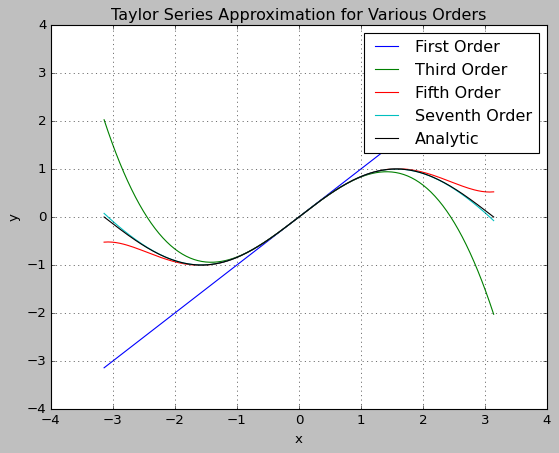

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
#plt.style.use("seaborn-v0_8-dark")
plt.style.use("classic")
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ["First Order", "Third Order", "Fifth Order", "Seventh Order"]

plt.figure(figsize = (8, 6))
for n, label in zip(range(4), labels):
  y = y + ((-1)**n*(x)**(2*n+1))/math.factorial(2*n+1)
  plt.plot(x, y, label = label)

plt.plot(x, np.sin(x), "k", label = "Analytic")
plt.grid()
plt.title("Taylor Series Approximation for Various Orders")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

**Try it!**: Compute the seventh order Taylor series approximation for $sin(x)$ around $a=0$ at $x = \pi/2$. Compare the value to the correct alue, $1$.

In [ ]:
x = np.pi/2
y = 0

for n in range(7):
  y = y + ((-1)**n*(x)**(2*n+1))/math.factorial(2*n+1)
  print(y)

1.5707963267948966
0.9248322292886504
1.0045248555348174
0.9998431013994987
1.0000035425842861
0.999999943741051
1.0000000006627803


The most common Taylor series approximation is the ﬁrst order approximation, or **linear approximation**.
Intuitively, for “smooth” functions the linear approximation of the function around a point, $a$, is legitimate provided you stay sufﬁciently close to $a$. In other words, “smooth” functions look more and more like a line the more you zoom into any point. In the ﬁgure below this has been plotted in successive levels of zoom using a smooth function to illustrate the linear nature of functions locally. Linear approximations are useful tools when analyzing “complicated” functions locally.

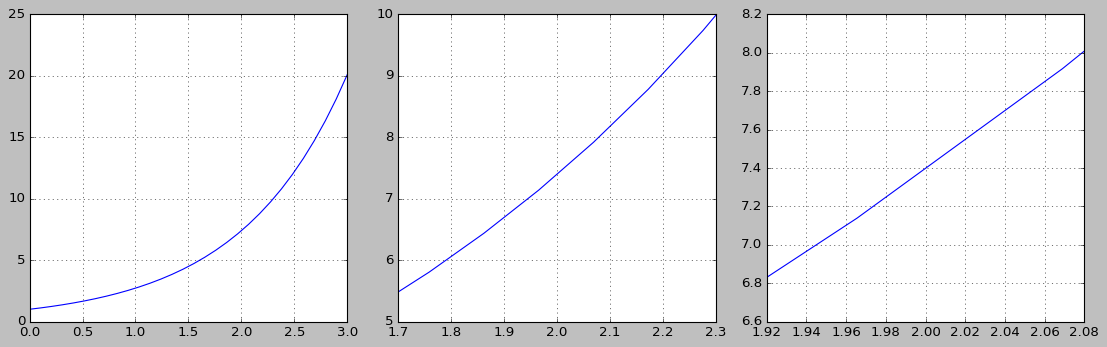

In [ ]:
x = np.linspace(0, 3, 30)
y = np.exp(x)

plt.figure(figsize = (14, 4.5))
plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(x, y)
plt.grid()
plt.xlim(1.7, 2.3)
plt.ylim(5, 10)
plt.subplot(1, 3, 3)
plt.plot(x, y)
plt.grid()
plt.xlim(1.92, 2.08)
plt.ylim(6.6, 8.2)
plt.tight_layout()
plt.show()

**Try it!**: Take the linear approximation for $e^x$ around point $a = 0$. Use the linear approximation for $e^x$ to approximate thevalue of $e^1$ and $e^{0.01}$. Use the `Numpy`'s function `exp` to compute `exp(1)` and `exp(0.01)` and compare the results.

In [ ]:
x1 = 1
print(f"Analytical {np.exp(1):.4f} vs. Approx {1 + x1}")

x2 = 0.01
print(f"Analytical {np.exp(0.01):.4f} vs. Approx {1 + x2}")



Analytical 2.7183 vs. Approx 2
Analytical 1.0101 vs. Approx 1.01


####**18.3 Discussion About Errors**

**18.3.1 Truncation Errors for Taylor Series**

In numerical analysis, there are usually two sources of error, **round-off** and **truncation**. The **round-off** errors are due to the inexactness in the representation of real numbers on a computer and the arithmetic operations performed with them. The truncation errors are due to the approximate nature of the method used and usually arise when using an approximation in place of an exact mathematical procedure, e.g., when we used Taylor series to approximate a function. For example, if we use Taylor series to approximate the function $e^x$ , we
obtain

$$e^x= 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...$$

Since it takes an infinite sequence to approximate the function, using only a few terms will result in an approximation (or truncation) error. For example, if we only use the ﬁrst four terms to approximate $e^2$, we obtain

$$e^2 \approx 1 + 2 + \frac{2^2}{2!} + \frac{2^3}{3!} = 6.333.$$

There is obviously an error associated with such a solution, since we truncated the rest of the terms in the Taylor series. Therefore the function $f(x)$ can be written as the Taylor series approximation plus a truncation error term

$$f(x) = f_n(x) + E_n(x).$$

The more terms we use, the closer the approximation will be to the next value. Let us use Python to calculate the above example.

**Try it!**: Approximate $e^2$  using different order Taylor series and print out the results.

In [ ]:
import numpy as np
import math

exp = 0
x = 2

for i in range(10):
  exp = exp + (x**i)/math.factorial(i)
  print(f"Using {i} - term, {exp:.4f}")
print(f"The true value of e^2 is:\n{np.exp(2):.4f}")

Using 0 - term, 1.0000
Using 1 - term, 3.0000
Using 2 - term, 5.0000
Using 3 - term, 6.3333
Using 4 - term, 7.0000
Using 5 - term, 7.2667
Using 6 - term, 7.3556
Using 7 - term, 7.3810
Using 8 - term, 7.3873
Using 9 - term, 7.3887
The true value of e^2 is:
7.3891


**18.3.2 Estimating Truncation Errors**

We can see that the higher order used to approximate the function at a point, the closer we are to the true value. For each order we choose, there is an arror associatd with it, and the approximation is only useful if we have a idea of how accurate the approximation is. **This is the motivation that we need to understand more about the errors.**

Using the Taylor series, if we use only the first $n$ terms, we can see that

$$f(x) = f_n(x) + E_n(x) = \sum_{k = 0}^n{\frac{f^{(k)}(a)(x-a)^k}{k!}+E_n(x).}$$

The $E_n(x)$ is the reminder of the Taylor series, or the truncation error that measures how far off the approximation $f_n(x)$. We can estimate the error using the **Taylor Remainder Estimation Theorem**, which states:

If the function $f(x)$ has $n+1$ derivatives for al $x$ in an interval $I$ containing $a$, then for each $x$ in $I$ there exists a $z$ between $x$ and $a$ such that

$$E_n(x) = \frac{f^{(n+1)}(z)(x-a)^{n+1}}{(n+1)!}$$

If we know that $M$ is the maximum value of $|f^{(n+1)}|$ in the interval, then we obtain

$$|E_n(x)| ≤ \frac{M|x-a|^{n+1}}{(n+1)!}$$

This provides us with a bound for the truncation error using this theorem. See the example below.

**Try it!**: Estimate the reminder bound for the approximation using the Taylor series for $e^2$ using $n = 9$. (**Notebook**)


In [ ]:
# Taylor Series for e^2

import numpy as np
import math

def taylor_exp(x, n):
  exp = 0
  for i in range(n):
    exp = exp + (x**i)/math.factorial(i)
  return exp



In [ ]:
abs(taylor_exp(2, 10) - np.exp(2))

np.float64(0.999656423115205)

####**18.3.3 Round-off Errors for Taylor Series**

Numerically, when adding many terms i a sum, we should be mindful of numerical accumulation oferrors that is due to floating point round-off errors; see the following example.

**Example**: Approximate $e^{-30}$ using different order series, and print out the results.

In [ ]:
# example with n = 200

x = -30
n_taylor = [100, 200, 400]
for i in n_taylor:
  taylor_app = taylor_exp(x, i)
  print(f"Using {i}-term, the result is {taylor_app}\nThe true value for e^2 is {np.exp(x)}")


Using 100-term, the result is -8.553020689132783e-05
The true value for e^2 is 9.357622968840175e-14
Using 200-term, the result is -8.553016433669241e-05
The true value for e^2 is 9.357622968840175e-14
Using 400-term, the result is -8.553016433669241e-05
The true value for e^2 is 9.357622968840175e-14


From the above example, it is clear that our estimation using Taylor series is not close to the true value anymore, no matter how many terms we include into the calculation, which isdue to the round-off errors we discussed earlier. To obtain a small result, when using negative large arguments, the Taylor series requires alternating large numbers to cancel out. We need many digits for precision in the series to capture both the large and small numbers with enough remaining digits to get the result in the desired output precision. This is why the program thrw an error message in the example above.

###**SUMMARY AND PROBLEMS**

1. Some functions can be perfectly represented by a Taylor series, which is an inﬁnite sum of polynomials.
2. Functions that have a Taylor series expansion can be approximated by truncating its Taylor series.
3. The linear approximation is a common local approximation for functions.
4. The truncation error can be estimated using the Taylor Remainder Estimation Theorem.
5. Be mindful of the round-off error in the Taylor series.

###**PROBLEMS**

**1.** Use Taylor series expansion to show that $e^{ix}=cos(x)+i\space{sin(x)}$, where $i = \sqrt{-1}$.

In [ ]:
import numpy as np
import math
math.pi

3.141592653589793

In [ ]:
(1j)**0*(x**0)/math.factorial(0)

(1+0j)

In [ ]:
# Taylor expansion
import numpy as np
import math
x = math.pi
n_values = [1, 5, 10]

def taylor_im(x, n):
  for i in range(n):
    exp = 0
    exp = exp + ((1j)**i)*(x**i)/math.factorial(i)
  return exp

for n_value in n_values:
  print(f"For n = {n_value}, the Taylor Series approx is: {taylor_im(x, n_value)}")
  print(f"The true value is: {math.cos(x) + 1j*math.sin(x)}")



For n = 1, the Taylor Series approx is: (1+0j)
The true value is: (-1+1.2246467991473532e-16j)
For n = 5, the Taylor Series approx is: (4.058712126416768+0j)
The true value is: (-1+1.2246467991473532e-16j)
For n = 10, the Taylor Series approx is: 0.08214588661112819j
The true value is: (-1+1.2246467991473532e-16j)


In [ ]:
taylor_im(1, 5)

(0.041666666666666664+0j)

**2.** Use the linear approximation of $sin(x)$ around $a=0$ to show that $\frac{sin(x)}{x}\approx 1$ for small $x$.

In [ ]:
# Taylor series for sin(x)
### Around a = 0
def taylor_sin(x, n):
  for i in range(n):
    f = 0
    f = f + (-1)**i*x**(2*i+1)/math.factorial(2*i+1)

  return f

x = np.linspace(0.001, 0.01, 20)
for x_value in x:
  print(f"Linear Taylor Approximation of sin(x)/x with x_{x_value:.4f} = {taylor_sin(x_value, 1)/x_value:.4f}")

Linear Taylor Approximation of sin(x)/x with x_0.0010 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0015 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0019 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0024 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0029 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0034 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0038 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0043 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0048 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0053 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0057 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0062 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0067 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0072 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0076 = 1.0000
Linear Taylor Approximation of sin(x)/x with x_0.0081 =

**3.** Write the Taylor series expansion for $e^{x^2}$ around $a=0$. Write a function `my_double_exp(x, n)`, which computes an approximation of $e^{x^2}$ using the first $n$ terms of the Taylor series expansion. Be sure that `my_double_exp(x, n)` can take array inputs.   

In [ ]:
def my_double_exp(x, n):
  """
  function that calculates the
  Taylor expansion of e^(x^2) by
  taking distinct values of x and n
  """
  double_exp = 0
  for i in range(n):
    double_exp += double_exp +

  return double_exp

In [ ]:
n_values = [1, 5, 10, 15, 20]
x = 1
for n_value in n_values:
  print(f"Taylor series for e^(x^2) with n = {n_value}: {my_double_exp(x, n_value):.4f}")
  print(f"True value for e^(x^2): {np.exp(x**2):.4f}")

Taylor series for e^(x^2) with n = 1: 1.0000
True value for e^(x^2): 2.7183
Taylor series for e^(x^2) with n = 5: 43.3333
True value for e^(x^2): 2.7183
Taylor series for e^(x^2) with n = 10: 1391.7601
True value for e^(x^2): 2.7183
Taylor series for e^(x^2) with n = 15: 44536.3295
True value for e^(x^2): 2.7183
Taylor series for e^(x^2) with n = 20: 1425162.5433
True value for e^(x^2): 2.7183


**4.** Write a function that gives the Taylor series approximation to the `np.exp` function around 0 for an order 1 through 7. Calculate the truncation error bound for order 7.

In [ ]:
n = 4
exp = 0
for i in range(n):
  exp += exp + (x**i)/math.factorial(i)
  print(exp)

1.0
4.0
10.0
21.333333333333336


In [ ]:
import numpy as np
import math

def taylor_exp(x, n_terms):
    """
    Approximates e^x using Taylor series expansion
    up to n_terms terms.
    """
    exp = 0  # Start with 0 and accumulate the sum
    for i in range(n_terms):
      exp += (x**i)/math.factorial(i)  # Add each term
    true_val = np.exp(x)
    error = abs(exp - true_val)/true_val
    print(f"Taylor Approx (n={n_terms}): {exp:.4f} vs. True Value: {true_val:.4f} --> Relative Error: {error:.4f}")

# Run for multiple values of n
x = 2
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_values:
  taylor_exp(x, n)


Taylor Approx (n=1): 1.0000 vs. True Value: 7.3891 --> Relative Error: 0.864665
Taylor Approx (n=2): 3.0000 vs. True Value: 7.3891 --> Relative Error: 0.593994
Taylor Approx (n=3): 5.0000 vs. True Value: 7.3891 --> Relative Error: 0.323324
Taylor Approx (n=4): 6.3333 vs. True Value: 7.3891 --> Relative Error: 0.142877
Taylor Approx (n=5): 7.0000 vs. True Value: 7.3891 --> Relative Error: 0.052653
Taylor Approx (n=6): 7.2667 vs. True Value: 7.3891 --> Relative Error: 0.016564
Taylor Approx (n=7): 7.3556 vs. True Value: 7.3891 --> Relative Error: 0.004534
Taylor Approx (n=8): 7.3810 vs. True Value: 7.3891 --> Relative Error: 0.001097
Taylor Approx (n=9): 7.3873 vs. True Value: 7.3891 --> Relative Error: 0.000237
Taylor Approx (n=10): 7.3887 vs. True Value: 7.3891 --> Relative Error: 0.000046


**5.** Compute the fourth order Tayor expansion for $sin(x)$ and $cos(x)$, and $sin(x)\cdotp{cos(x)}$ around $0$, which produces a smaller error for $x = \pi/2$. Which is correct: computing separately Taylor expansion for $sin$ and $cos$ and then multiplying the result together, or computing the Taylor expansion for the product first and then plugging in $x$?

In [ ]:
import numpy as np
import math
def taylor_sin(x, n_terms):
  """
  Taylor series for sin(x)
  """
  # Initialize sin(x) value
  sin = 0

  #Define the Taylor series for cos(x)
  for i in range(n_terms):
    sin += ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1)
  print(f"Taylor series for sin(x) {n_terms}-th order: {sin:.5f}")
  print(f"True value: {np.sin(x):.5f}")
  return sin

def taylor_cos(x, n_terms):
  # Initialize the cos(x) value
  cos = 0
  #Define the Taylor series for cos(x)
  for i in range(n_terms):
    cos += (-1)**(i)*x**(2*i)/math.factorial(2*i)
  print("----------------------------------------")
  print(f"Taylor series for cos(x) {n_terms}-th order: {cos:.5f}")
  print(f"True value: {np.cos(x):.5f}")
  return cos

x = math.pi/2
n_terms = 4
taylor_sin(x, n_terms)
taylor_cos(x, n_terms)


Taylor series for sin(x) 4-th order: 0.99984
True value: 1.00000
----------------------------------------
Taylor series for cos(x) 4-th order: -0.00089
True value: 0.00000


-0.0008945229984747317

In [ ]:
import numpy as np
import math
def taylor_sin_prod_cos(x, n_terms):
  """
  Taylor series for sin(x)
  """
  # Initialize sin(x) value
  sin_cos = 0

  #Define the Taylor series for cos(x)
  for i in range(n_terms):
    sin_cos += ((-1)**i)*2**(2*i)*x**(2*i+1)/math.factorial(2*i+1)
  print(f"Taylor series for sin(x)cos(x) {n_terms}-th order: {sin_cos:.5f}")
  print(f"True value: {np.sin(x)*np.cos(x):.5f}")

x = math.pi/2
n = 6
taylor_sin_prod_cos(x, n)


Taylor series for sin(x)cos(x) 6-th order: -0.00022
True value: 0.00000


Testing the mutiplication between the Taylor series for $sin(x)$ and $cos(x)$ separately.

In [ ]:
x = math.pi/2
n = 10
mult_taylor_series = taylor_sin(x, n)*taylor_cos(x, n)
print(mult_taylor_series)

Taylor series for sin(x) 10-th order: 1.00000
True value: 1.00000
----------------------------------------
Taylor series for cos(x) 10-th order: -0.00000
True value: 0.00000
-3.3769215522516056e-15
